In [1]:
from pandas_datareader import data as pdr #read data from yahoo finance api
import yfinance as yf
import matplotlib.pyplot as plt #viz #GUI manager
import seaborn as sns #viz #plotly is another package
import datetime
import pandas as pd
import numpy as np
from pandas import Grouper #groupby
#statistical data exploration, conducting statistical tests, and estimation of different statistical models
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf #autocorrelation plot
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing # double and triple exponential smoothing
from pandas.plotting import autocorrelation_plot #autocorrelation plot
from statsmodels.graphics.gofplots import qqplot #residual diagnostics
from sklearn.metrics import mean_squared_error #accuracy metrics
from math import sqrt
from sklearn.metrics import mean_absolute_error #accuracy metrics

from random import gauss #create gaussian white noise
from random import seed
from pandas import Series

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_error


In [3]:
# load dataset
center_info = pd.read_csv('fulfilment_center_info.csv')
meal_info = pd.read_csv('meal_info.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [4]:
train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [5]:
test.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [6]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [7]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [8]:
# join the dataframes
# Merge datasets for a consolidated view
full_data = train.merge(meal_info, on='meal_id', how='left')
full_data = full_data.merge(center_info, on='center_id', how='left')
full_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


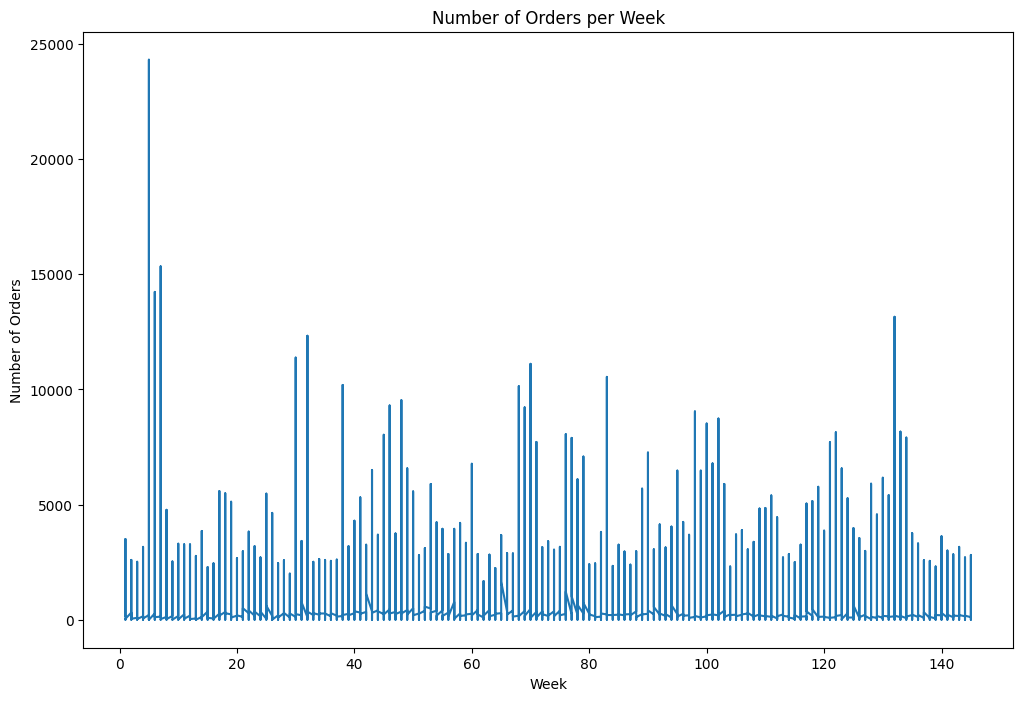

In [9]:
# plot line graph of week vs num_orders
# Plot the graph
plt.figure(figsize=(12,8))
plt.plot(full_data['week'], full_data['num_orders'])
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Week')
plt.show()

In [10]:
# EDA Functions
def plot_distributions(data, variables, titles):
    sns.set_style("whitegrid")
    plt.figure(figsize=(18, 5))
    for i, var in enumerate(variables):
        plt.subplot(1, 3, i+1)
        sns.histplot(data[var], bins=50, kde=True)
        plt.title(titles[i])
    plt.tight_layout()
    plt.show()

def plot_weekly_orders(data):
    weekly_orders = data.groupby('week')['num_orders'].sum().reset_index()
    sns.lineplot(x='week', y='num_orders', data=weekly_orders)
    plt.title('Trend of Total Orders Over Weeks')
    plt.show()
def plot_promotion_impact(data, promotion_features):
    for feature in promotion_features:
        sns.boxplot(x=feature, y='num_orders', data=data)
        plt.title(f'Impact of {feature} on Orders')
        plt.show()

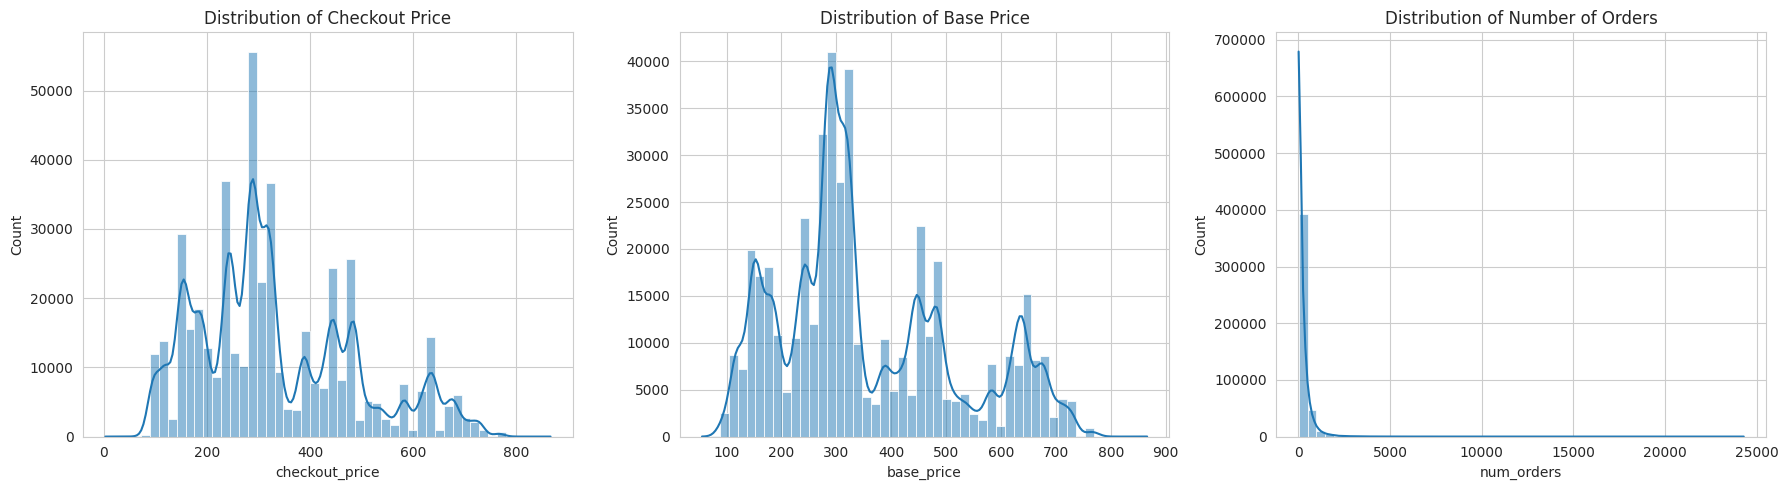

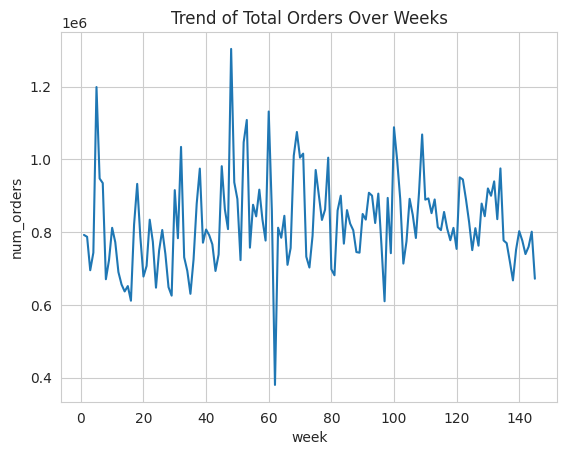

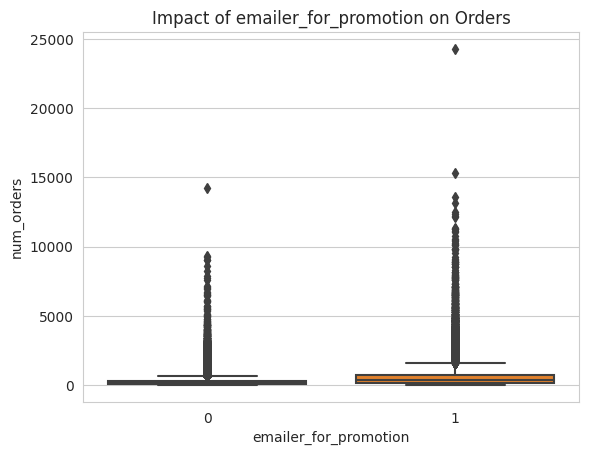

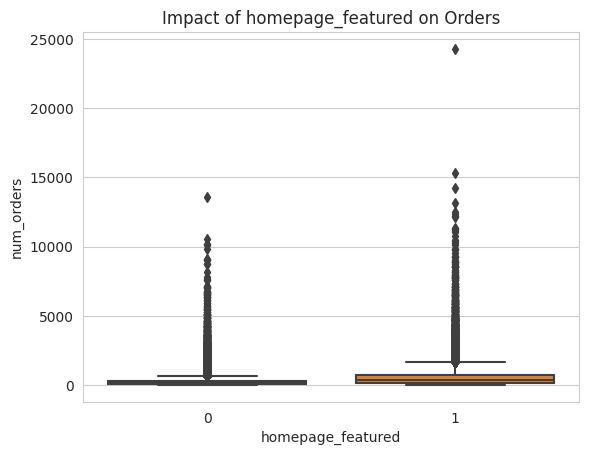

In [11]:
# EDA Execution
variables_to_plot = ['checkout_price', 'base_price', 'num_orders']
titles = ['Distribution of Checkout Price', 'Distribution of Base Price', 'Distribution of Number of Orders']
plot_distributions(full_data, variables_to_plot, titles)
plot_weekly_orders(full_data)
promotion_features = ['emailer_for_promotion', 'homepage_featured']
plot_promotion_impact(full_data, promotion_features)

In [12]:
# just keep week, meal_id, emailer_for_promotion, homepage_featured, num_orders
df = full_data[['week', 'meal_id', 'emailer_for_promotion', 'homepage_featured', 'num_orders']]

In [13]:
# set week as index
df = df.set_index('week')
df.head()

,meal_id,emailer_for_promotion,homepage_featured,num_orders
week,,,,
1,1885,0,0,177
1,1993,0,0,270
1,2539,0,0,189
1,2139,0,0,54
1,2631,0,0,40


<Axes: xlabel='meal_id'>

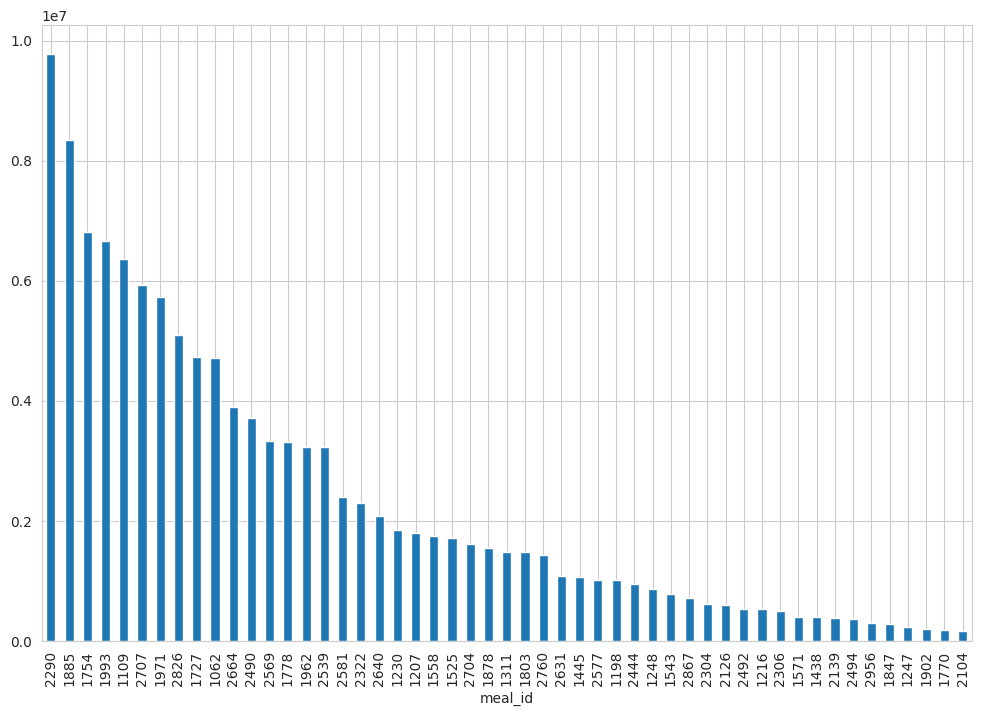

In [14]:
# show which meal_id is the most popular
# show me the table of meal_id and num_orders
df.groupby('meal_id')['num_orders'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12,8))

In [15]:
# meal_id 2290 is the most popular
# show the row of meal_id 2290 in the meal dataframe
meal_info[meal_info['meal_id'] == 1062]

,meal_id,category,cuisine
6,1062,Beverages,Italian


### Meal_id #2290

In [16]:
mealId = df[df['meal_id'] == 1062]
mealId.head()

,meal_id,emailer_for_promotion,homepage_featured,num_orders
week,,,,
1,1062,0,0,391
1,1062,0,0,514
1,1062,0,0,798
1,1062,0,0,284
1,1062,0,0,256


In [17]:
# just keep the index week and num_orders
mealId = mealId[['num_orders']]
mealId.head()

,num_orders
week,
1,391
1,514
1,798
1,284
1,256


In [18]:
# grounp by week and sum the num_orders, still in dataframe, and keep the index week
mealId = mealId.groupby('week')['num_orders'].sum().to_frame()
print(len(mealId))
mealId.head()

145


,num_orders
week,
1,28943
2,26695
3,27844
4,31144
5,29324


<Axes: xlabel='week'>

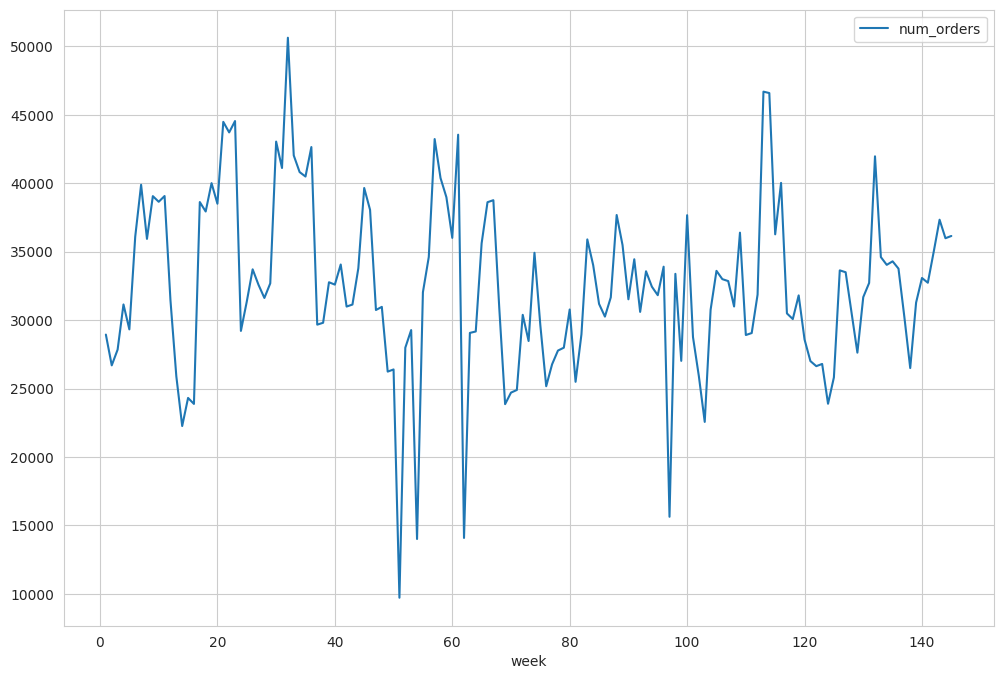

In [19]:
# plot the line graph of num_orders
mealId.plot(figsize=(12,8))

<Axes: xlabel='week'>

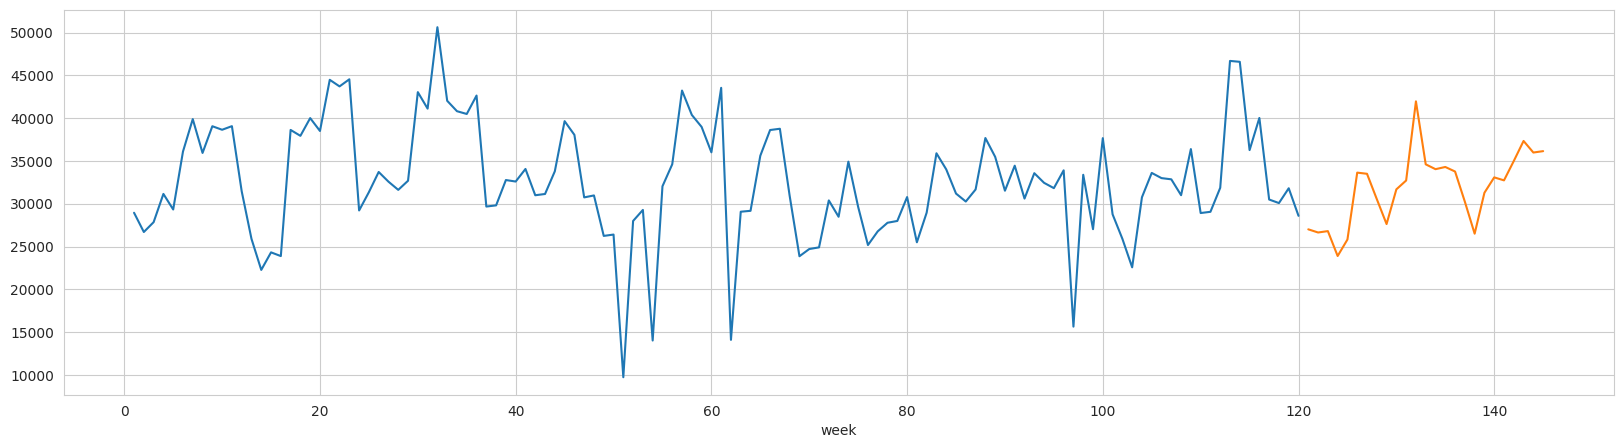

In [20]:
from sklearn.model_selection import train_test_split

test_size = 25
train_data, test_data = train_test_split(mealId,
                                         test_size=test_size,
                                         random_state=25,
                                         shuffle = False)
plt.figure(figsize=(20, 5))
train_data['num_orders'].plot(label='Train')
test_data['num_orders'].plot(label='Test')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='week'>

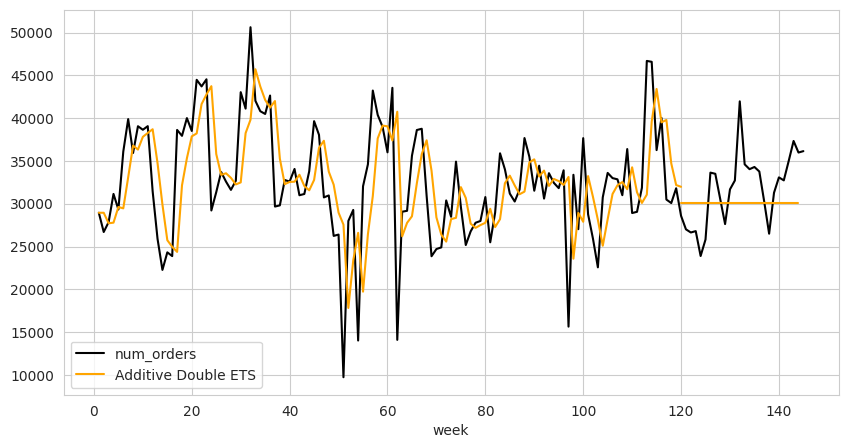

In [21]:
ax = mealId.plot(color='black', figsize=(10,5), legend=True)

simple_ets_auto = SimpleExpSmoothing(train_data).fit()
simple_ets_auto_pred = simple_ets_auto.forecast(25).rename('alpha=%s'%simple_ets_auto.model.params['smoothing_level'])

simple_ets_auto.fittedvalues.plot(ax=ax, color='orange')
simple_ets_auto_pred.plot(ax=ax, color='orange', legend=True, label = 'Additive Double ETS')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided a

<Axes: xlabel='week'>

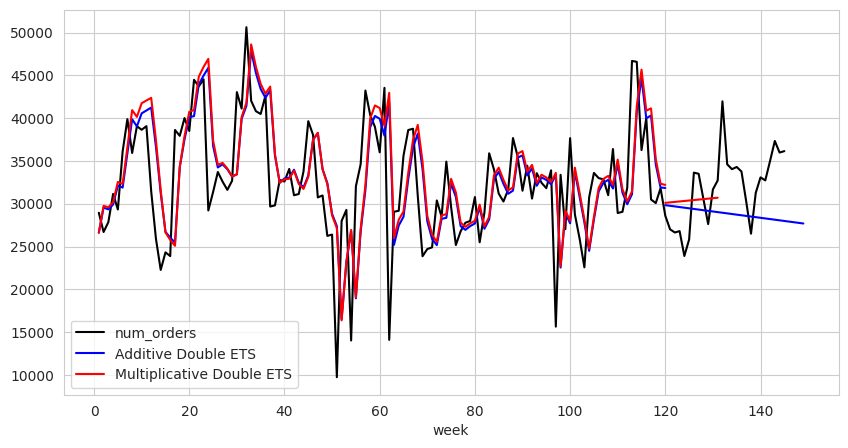

In [22]:
ax = mealId.plot(color='black', figsize=(10,5), legend=True)

double_ets_add = ExponentialSmoothing(train_data, trend = 'add').fit()
double_ets_add_pred = double_ets_add.forecast(30)

double_ets_add.fittedvalues.plot(ax=ax, color='blue')
double_ets_add_pred.plot(ax=ax, color='blue', legend=True, label = 'Additive Double ETS')

double_ets_mul = ExponentialSmoothing(train_data, trend = 'mul').fit()
double_ets_mul_pred = double_ets_mul.forecast(12)

double_ets_mul.fittedvalues.plot(ax=ax, color='red')
double_ets_mul_pred.plot(ax=ax, color='red', legend=True, label = 'Multiplicative Double ETS')

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided a

<Axes: xlabel='week'>

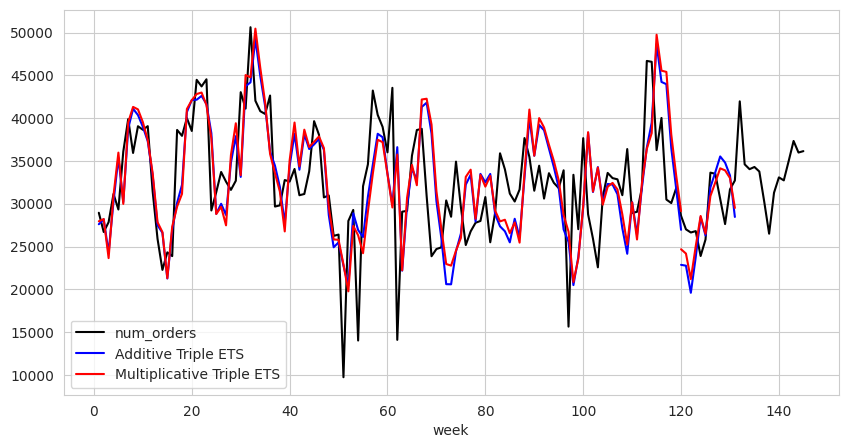

In [23]:
ax = mealId.plot(color='black', figsize=(10,5), legend=True)

triple_ets_add = ExponentialSmoothing(train_data, trend = 'add', seasonal = 'add', seasonal_periods=12).fit()
triple_ets_add_pred = triple_ets_add.forecast(12)

triple_ets_add.fittedvalues.plot(ax=ax, color='blue')
triple_ets_add_pred.plot(ax=ax, color='blue', legend=True, label = 'Additive Triple ETS')

triple_ets_mul = ExponentialSmoothing(train_data, trend = 'mul', seasonal = 'mul', seasonal_periods=12).fit()
triple_ets_mul_pred = triple_ets_mul.forecast(12)

triple_ets_mul_pred.plot(ax=ax, color='red', legend=True, label = 'Multiplicative Triple ETS')
triple_ets_mul.fittedvalues.plot(ax=ax, color='red')

arima and ets

In [28]:
!pip install pmdarima -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 10.1 MB/s eta 0:00:00


In [29]:
import random
from datetime import date, timedelta
from math import sqrt

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pmdarima as pm
import seaborn as sns
import statsmodels.api as sm
import torch
import torch.nn as nn
import torch.optim as optim
import torch.utils.data as data
from dateutil.relativedelta import relativedelta
from matplotlib.ticker import MaxNLocator
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.stattools import adfuller
from torch.autograd import Variable

from math import sqrt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta
from sklearn.model_selection import train_test_split


In [30]:
mealId = mealId.groupby('week')['num_orders'].sum().to_frame()

In [31]:
import pmdarima as pm
import pandas as pd
import matplotlib.pyplot as plt

weekly_data = mealId['num_orders']

# Using auto_arima to find the best ARIMA model
weekly_arima_auto = pm.auto_arima(weekly_data, m=12, seasonal=True, test='adf', trace=True)

# Summarize the model
weekly_arima_auto.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=2924.410, Time=4.52 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2955.267, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=2920.523, Time=1.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2934.805, Time=0.25 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=3431.768, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[12] intercept   : AIC=2919.120, Time=0.14 sec
 ARIMA(1,0,0)(0,0,1)[12] intercept   : AIC=2920.491, Time=0.92 sec
 ARIMA(1,0,0)(1,0,1)[12] intercept   : AIC=2922.452, Time=1.41 sec
 ARIMA(2,0,0)(0,0,0)[12] intercept   : AIC=2918.976, Time=0.10 sec
 ARIMA(2,0,0)(1,0,0)[12] intercept   : AIC=2920.744, Time=1.25 sec
 ARIMA(2,0,0)(0,0,1)[12] intercept   : AIC=2920.721, Time=0.46 sec
 ARIMA(2,0,0)(1,0,1)[12] intercept   : AIC=2922.717, Time=1.25 sec
 ARIMA(3,0,0)(0,0,0)[12] intercept   : AIC=2918.309, Time=0.24 sec
 ARIMA(3,0,0)(1,0,0)[12] intercept   : AIC=2919.879, Time=2.24 sec
 ARIMA(3,0,0)(0,0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  145
Model:               SARIMAX(3, 0, 0)   Log Likelihood               -1454.154
Date:                Sat, 09 Dec 2023   AIC                           2918.309
Time:                        22:02:39   BIC                           2933.192
Sample:                             0   HQIC                          2924.356
                                - 145                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.701e+04   2698.028      6.306      0.000    1.17e+04    2.23e+04
ar.L1          0.4367      0.082      5.325      0.000       0.276       0.597
ar.L2          0.1762      0.110      1.607      0.108      -0.039       0.391
ar.L3         -0.1363      0.064     -2.117      0.034      -0.262      -0.010
sigma2      3.043e+07      0.395    7.7e+07      0.000    3.04e+07    3.04e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                87.81
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.94
Prob(H) (two-sided):                  0.43   Kurtosis:                         6.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.42e+23. Standard errors may be unstable.
"""

### Forecast for the next 20 weeks

In [32]:
weekly_arima_fc, confint = weekly_arima_auto.predict(n_periods=20,
                                                       return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


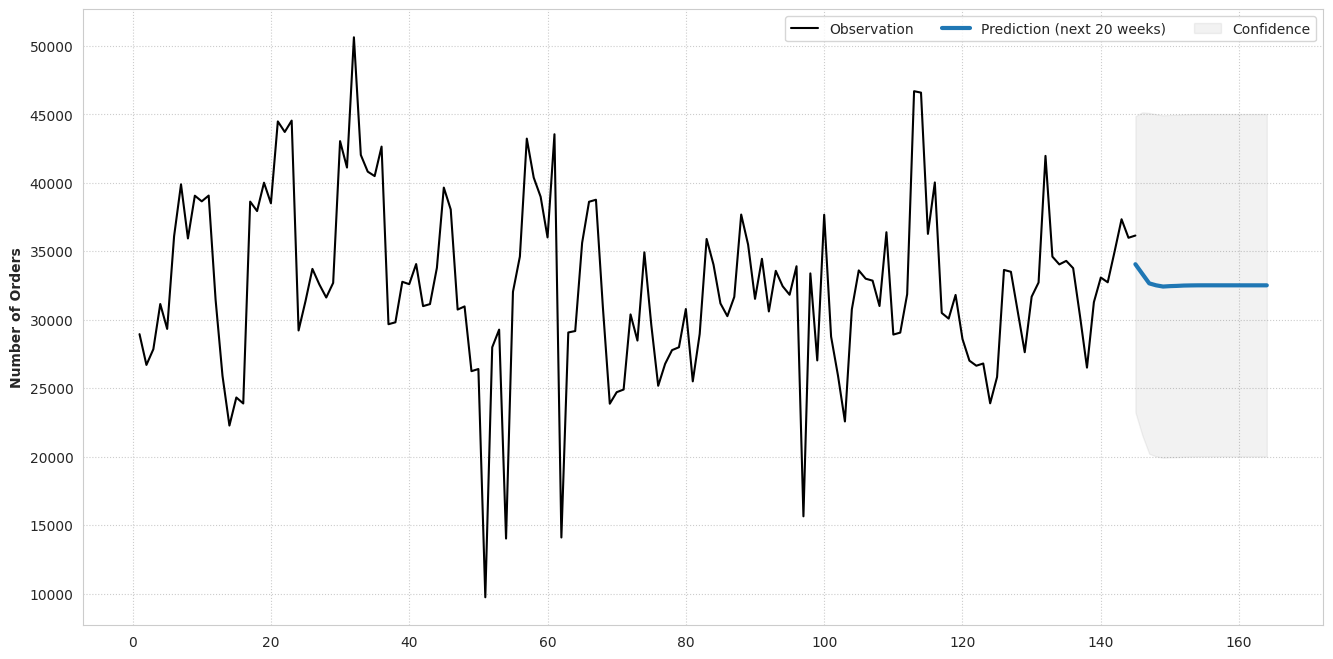

In [33]:
fig, ax = plt.subplots(figsize=(16, 8))
ax.plot(mealId, label='Observation', color='black')
ax.plot(weekly_arima_fc, label='Prediction (next 20 weeks)', linewidth=3)
ax.fill_between(weekly_arima_fc.index,
                confint[:, 0],
                confint[:, 1],
                color='k', alpha=0.05, label='Confidence')
ax.legend(ncols=3)
ax.set_ylabel("Number of Orders", fontweight='bold')
ax.grid(linestyle='dotted')
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


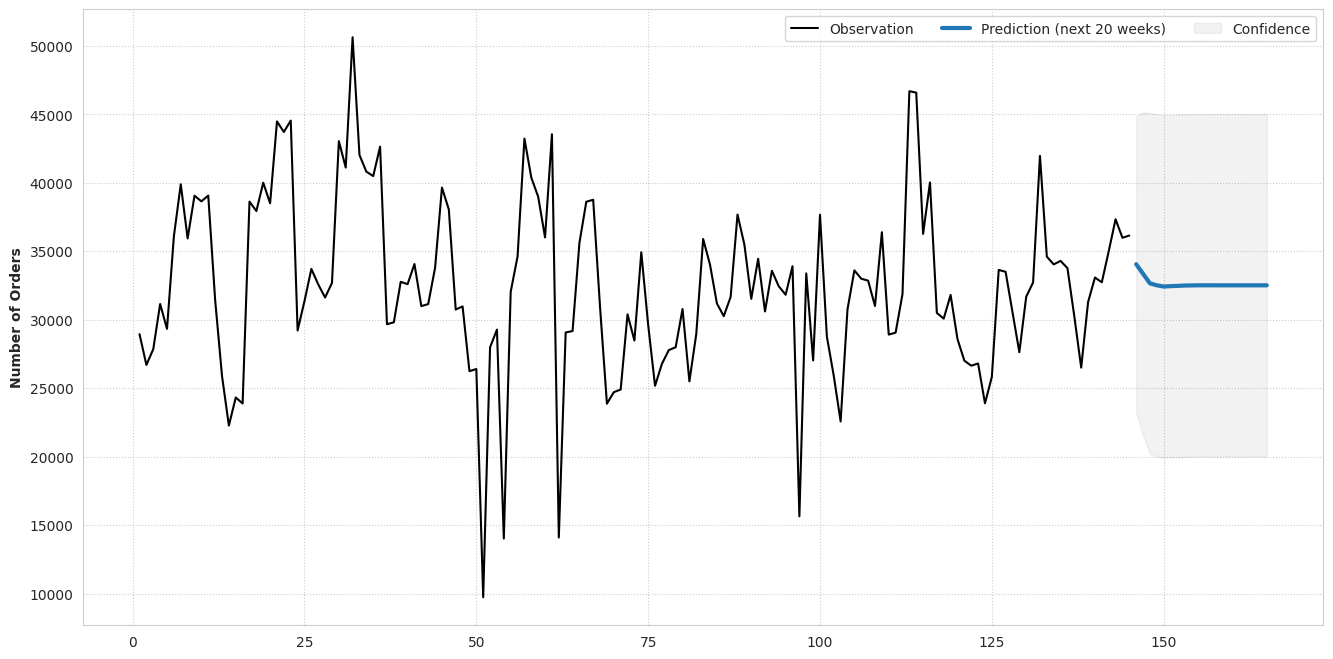

In [34]:
# Forecast for the next 20 weeks
weekly_arima_fc, confint = weekly_arima_auto.predict(n_periods=20, return_conf_int=True)

# Create a new index for the forecast period
last_index = mealId.index[-1]
forecast_index = np.arange(last_index + 1, last_index + 21)

fig, ax = plt.subplots(figsize=(16, 8))

# Plot original data
ax.plot(mealId.index, mealId, label='Observation', color='black')

# Plot the forecast
ax.plot(forecast_index, weekly_arima_fc, label='Prediction (next 20 weeks)', linewidth=3)

# Plot the confidence interval
ax.fill_between(forecast_index,
                confint[:, 0],
                confint[:, 1],
                color='k', alpha=0.05, label='Confidence')

ax.legend(ncols=3)
ax.set_ylabel("Number of Orders", fontweight='bold')
ax.grid(linestyle='dotted')
plt.show()


In [35]:
def calcMetrics(test, pred, modelname: str):
    actuals = test.values.flatten()
    predictions = pred.values.flatten()
    mse = mean_squared_error(actuals, predictions) * 1e-10
    rmse = sqrt(mean_squared_error(actuals, predictions)) * 1e-5
    mae = mean_absolute_error(actuals, predictions) * 1e-5
    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100
    metrics = {
        'Model': modelname,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }
    return pd.DataFrame(metrics, index=[0])

class EvalModel:

    def __init__(self, data, model, modelname: str, test_freq: int) -> None:
        train_data, test_data = train_test_split(data,
                                                 test_size=test_freq,
                                                 random_state=25,
                                                 shuffle=False)
        self.train = train_data
        self.test = test_data
        self.model = model
        self.modelname = modelname
        if ('Auto' in modelname):
            self.pred = model.fit_predict(train_data,
                                          n_periods=test_freq)
        else:
            self.pred = model.predict(start=test_data.index[0],
                                      end=test_data.index[-1])
        self.metrics = calcMetrics(self.test, self.pred, modelname)

    def plot(self, ax: plt.Axes, train_days: int = -1):
        if (train_days > 0):
            train_start_index = max(0, len(self.train) - train_days)
            train = self.train.iloc[train_start_index:]
        else:
            train = self.train
        ax.plot(train.index,
                train,
                label='Train', color='black', linewidth=1)
        ax.plot(self.test.index,
                self.test,
                label='Actual', color='red')
        ax.plot(self.pred.index,
                self.pred,
                label='Predict', marker='.', alpha=0.7)
        ax.legend(loc='upper right', ncols=3, fontsize=8)
        ax.grid(True, linestyle='dotted')


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

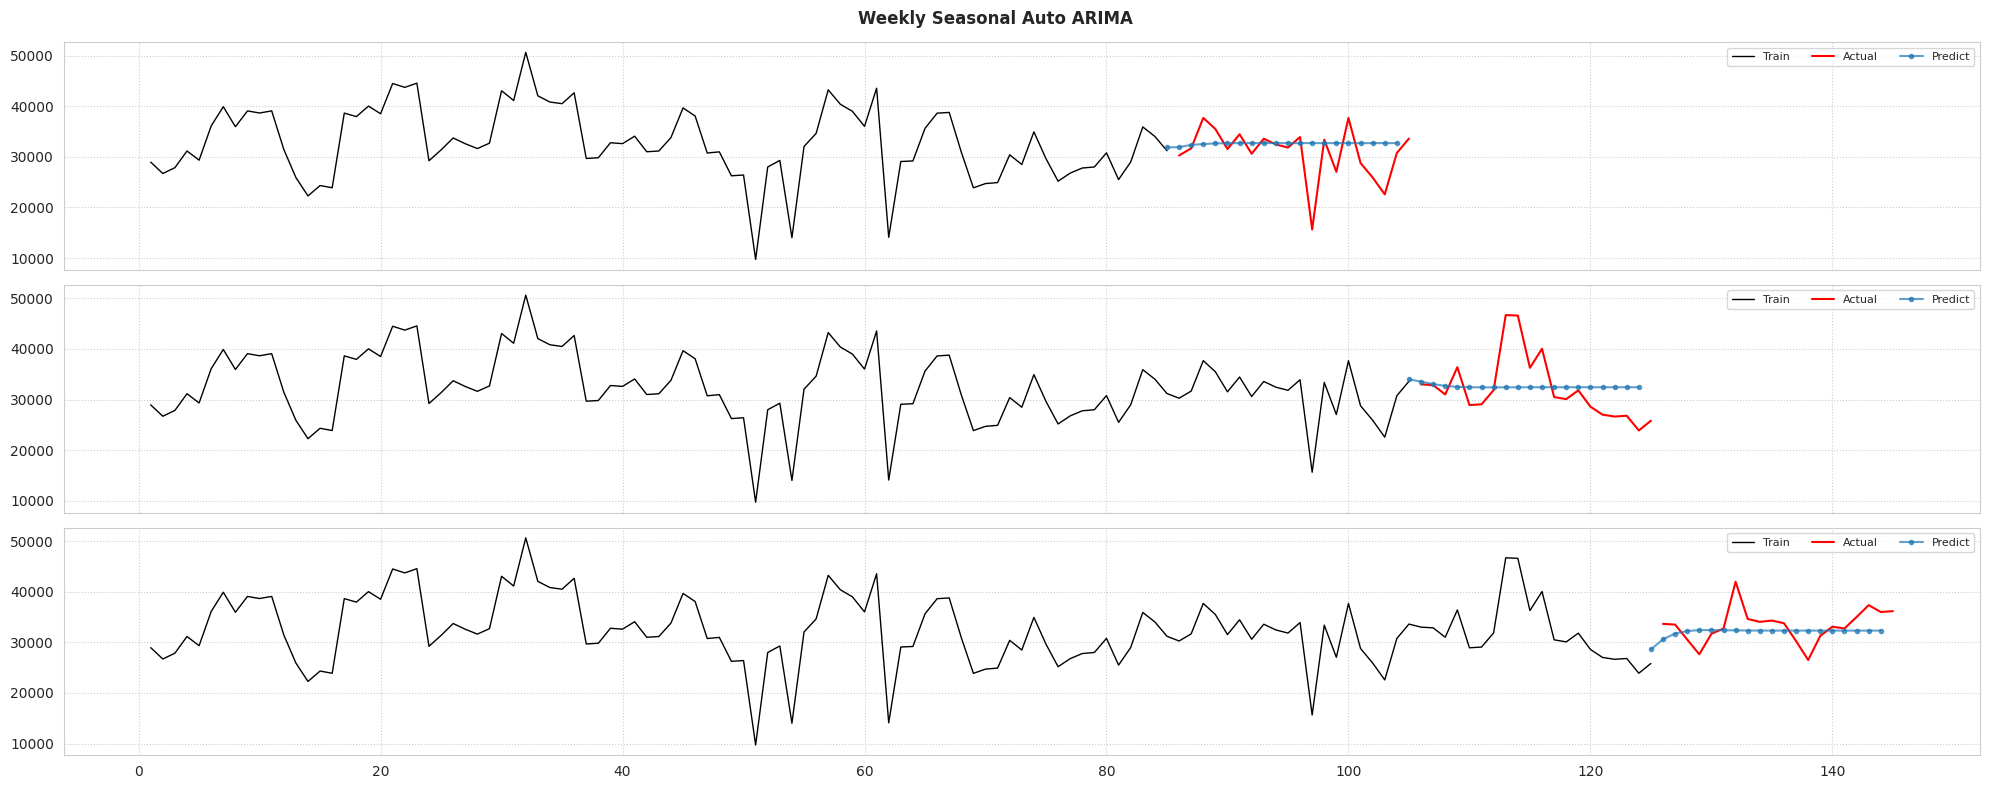

MSE      0.002648
RMSE     0.050370
MAE      0.037159
MAPE    12.567248
dtype: float64

In [36]:

def calcWeeklyPredEvalMetrics(obs_data, eval_wks: list[int],
                               model, modelname: str, figsize=(20, 8)):
    metrics_df = pd.DataFrame()
    fig, axs = plt.subplots(len(eval_wks), 1, figsize=figsize,
                            sharex=True, sharey=True)
    for i, wk in enumerate(eval_wks):
        ax = axs[i]
        curr_data = obs_data.iloc[:wk]
        curr_eval = EvalModel(curr_data, model, modelname, 20)
        curr_eval.plot(ax)
        metrics_df = pd.concat([metrics_df, curr_eval.metrics])
    fig.suptitle(modelname, fontweight='bold')
    plt.tight_layout()
    plt.show()
    return metrics_df

# Adjust eval_wks for three periods of backtesting, each 20 weeks long
# Assuming 145 is the latest week in your data
eval_wks = [105, 125, 145]  # Each element here is the end of a 20-week period
weekly_arima_metrics = calcWeeklyPredEvalMetrics(mealId,
                                                   eval_wks,
                                                   weekly_arima_auto,
                                                   'Weekly Seasonal Auto ARIMA')
weekly_arima_metrics.mean(numeric_only=True)

ETS

annually

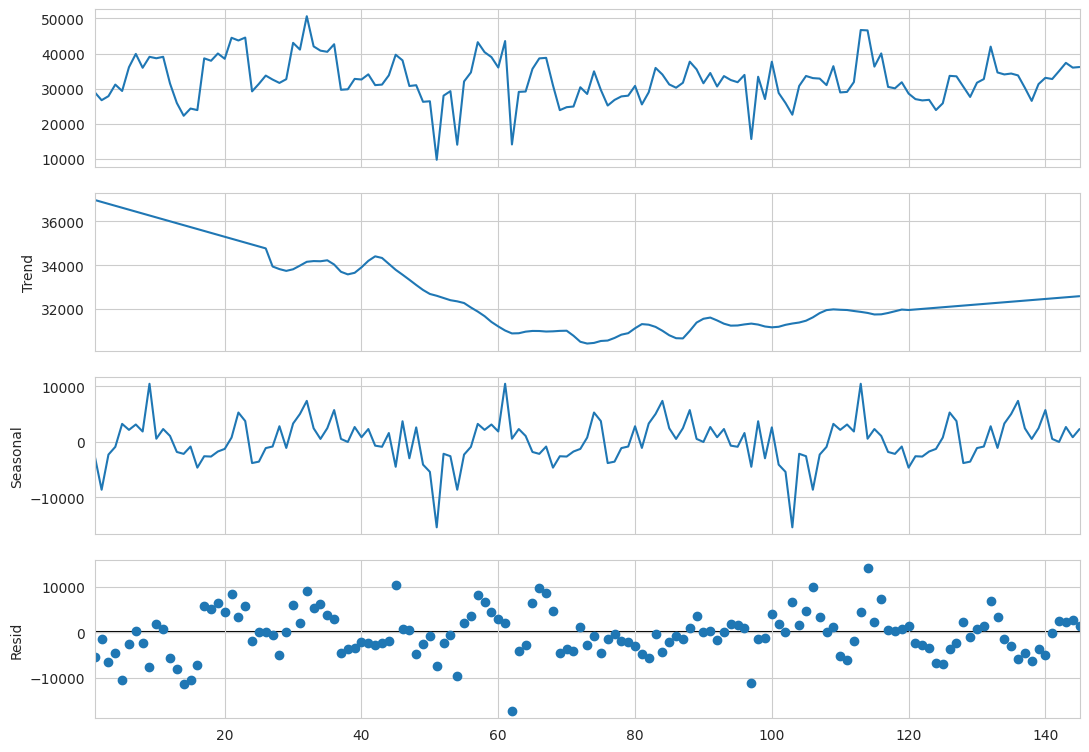

In [37]:
import statsmodels.api as sm
import matplotlib.pyplot as plt

fig = sm.tsa.seasonal_decompose(mealId, period=52, extrapolate_trend='freq').plot()
fig.set_size_inches((12, 8))
plt.show()


weekly

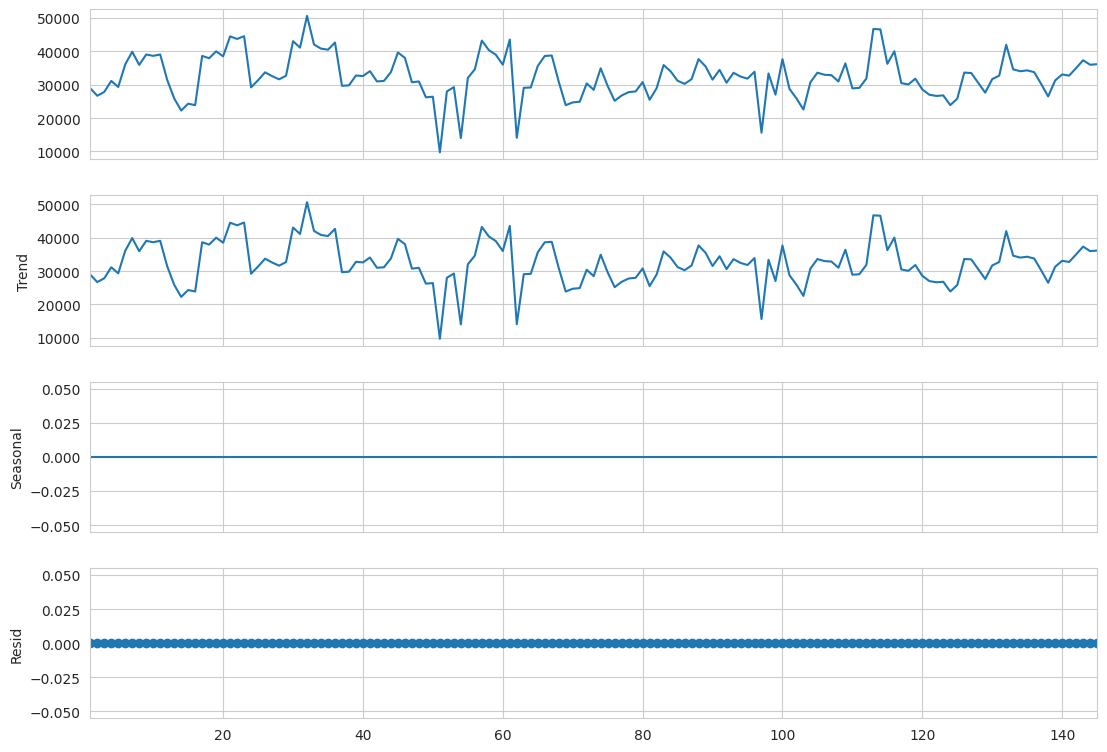

In [38]:
fig = sm.tsa.seasonal_decompose(mealId, period=1, extrapolate_trend='freq').plot()
fig.set_size_inches((12, 8))
plt.show()


quarterly

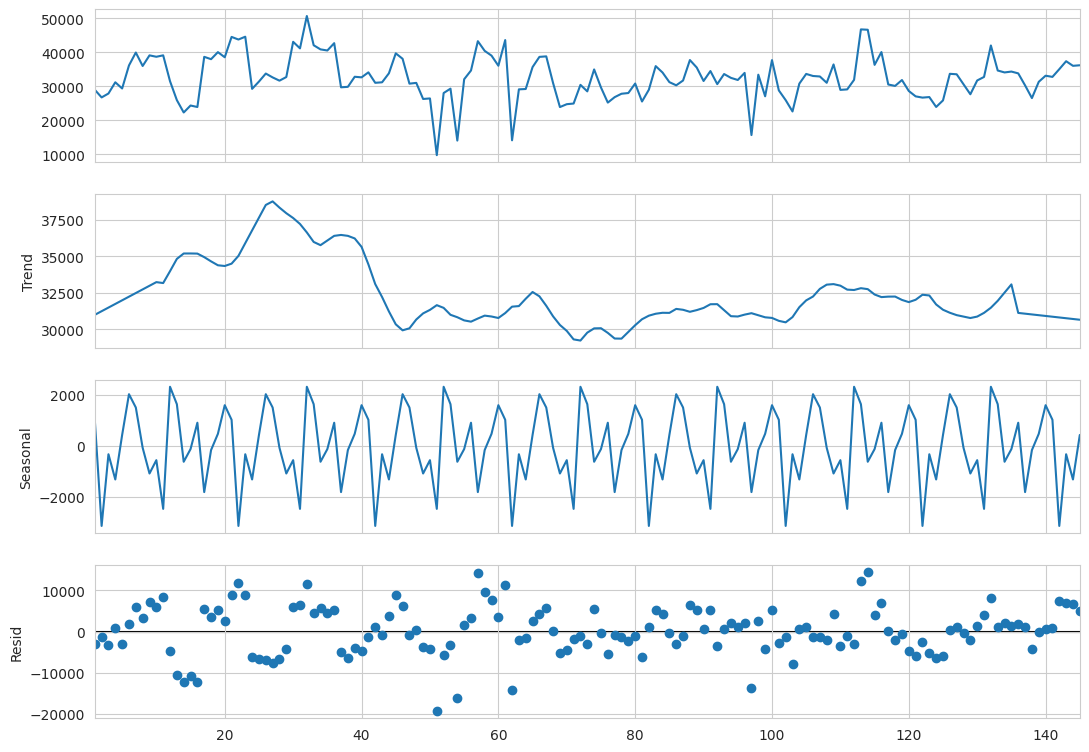

In [39]:
fig = sm.tsa.seasonal_decompose(mealId, period=20, extrapolate_trend='freq').plot()
fig.set_size_inches((12, 8))
plt.show()


fitting

In [40]:
weekly_ets_add = ExponentialSmoothing(mealId,
                                       trend='add', seasonal='add',
                                       seasonal_periods=20)
weekly_ets_add_fitted = weekly_ets_add.fit()
weekly_ets_add_fc = weekly_ets_add_fitted.forecast(20)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [41]:
weekly_ets_add_fc

145    37517.595429
146    35947.254548
147    35547.594950
148    32501.562489
149    34504.964318
150    31601.488924
151    38091.323779
152    34405.650006
153    30991.080911
154    34641.744822
155    34698.257058
156    37848.410749
157    37364.588538
158    38406.719567
159    38080.369597
160    40646.755149
161    33297.579820
162    39044.191945
163    35393.621866
164    38254.452571
dtype: float64

In [42]:
# Calculate the start of the forecast index as the last index of mealId plus one.
start_of_forecast = mealId.index[-1] + 1

# Create a new index for the forecast that continues from the last index of mealId.
forecast_index = np.arange(start_of_forecast, start_of_forecast + 20)

# Assign this new index to the forecast.
weekly_ets_add_fc.index = forecast_index
weekly_ets_add_fc

146    37517.595429
147    35947.254548
148    35547.594950
149    32501.562489
150    34504.964318
151    31601.488924
152    38091.323779
153    34405.650006
154    30991.080911
155    34641.744822
156    34698.257058
157    37848.410749
158    37364.588538
159    38406.719567
160    38080.369597
161    40646.755149
162    33297.579820
163    39044.191945
164    35393.621866
165    38254.452571
dtype: float64

In [43]:
weekly_ets_mul = ExponentialSmoothing(mealId,
                                       trend='mul', seasonal='mul',
                                       seasonal_periods=20)
weekly_ets_mul_fitted = weekly_ets_mul.fit()
weekly_ets_mul_fc = weekly_ets_mul_fitted.forecast(20)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [44]:
weekly_ets_add_mul = ExponentialSmoothing(mealId,
                                           trend='add', seasonal='mul',
                                           seasonal_periods=20)
weekly_ets_add_mul_fitted = weekly_ets_add_mul.fit()
weekly_ets_add_mul_fc = weekly_ets_add_mul_fitted.forecast(20)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [45]:
weekly_ets_mul_add = ExponentialSmoothing(mealId,
                                           trend='mul', seasonal='add',
                                           seasonal_periods=20)
weekly_ets_mul_add_fitted = weekly_ets_mul_add.fit()
weekly_ets_mul_add_fc = weekly_ets_mul_add_fitted.forecast(20)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


forecasting

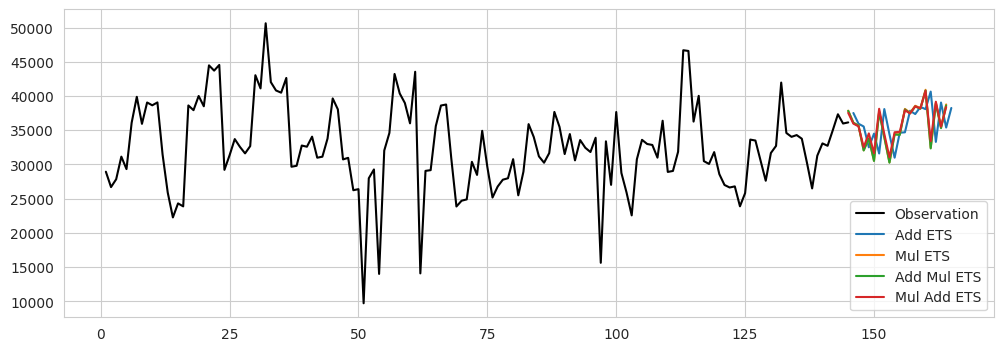

In [46]:
plt.figure(figsize=(12, 4))
plt.plot(mealId, label='Observation', color='black')
plt.plot(weekly_ets_add_fc, label='Add ETS')
plt.plot(weekly_ets_mul_fc, label='Mul ETS')
plt.plot(weekly_ets_add_mul_fc, label='Add Mul ETS')
plt.plot(weekly_ets_mul_add_fc, label='Mul Add ETS')
plt.legend(loc='lower right')
plt.show()

evaluation

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


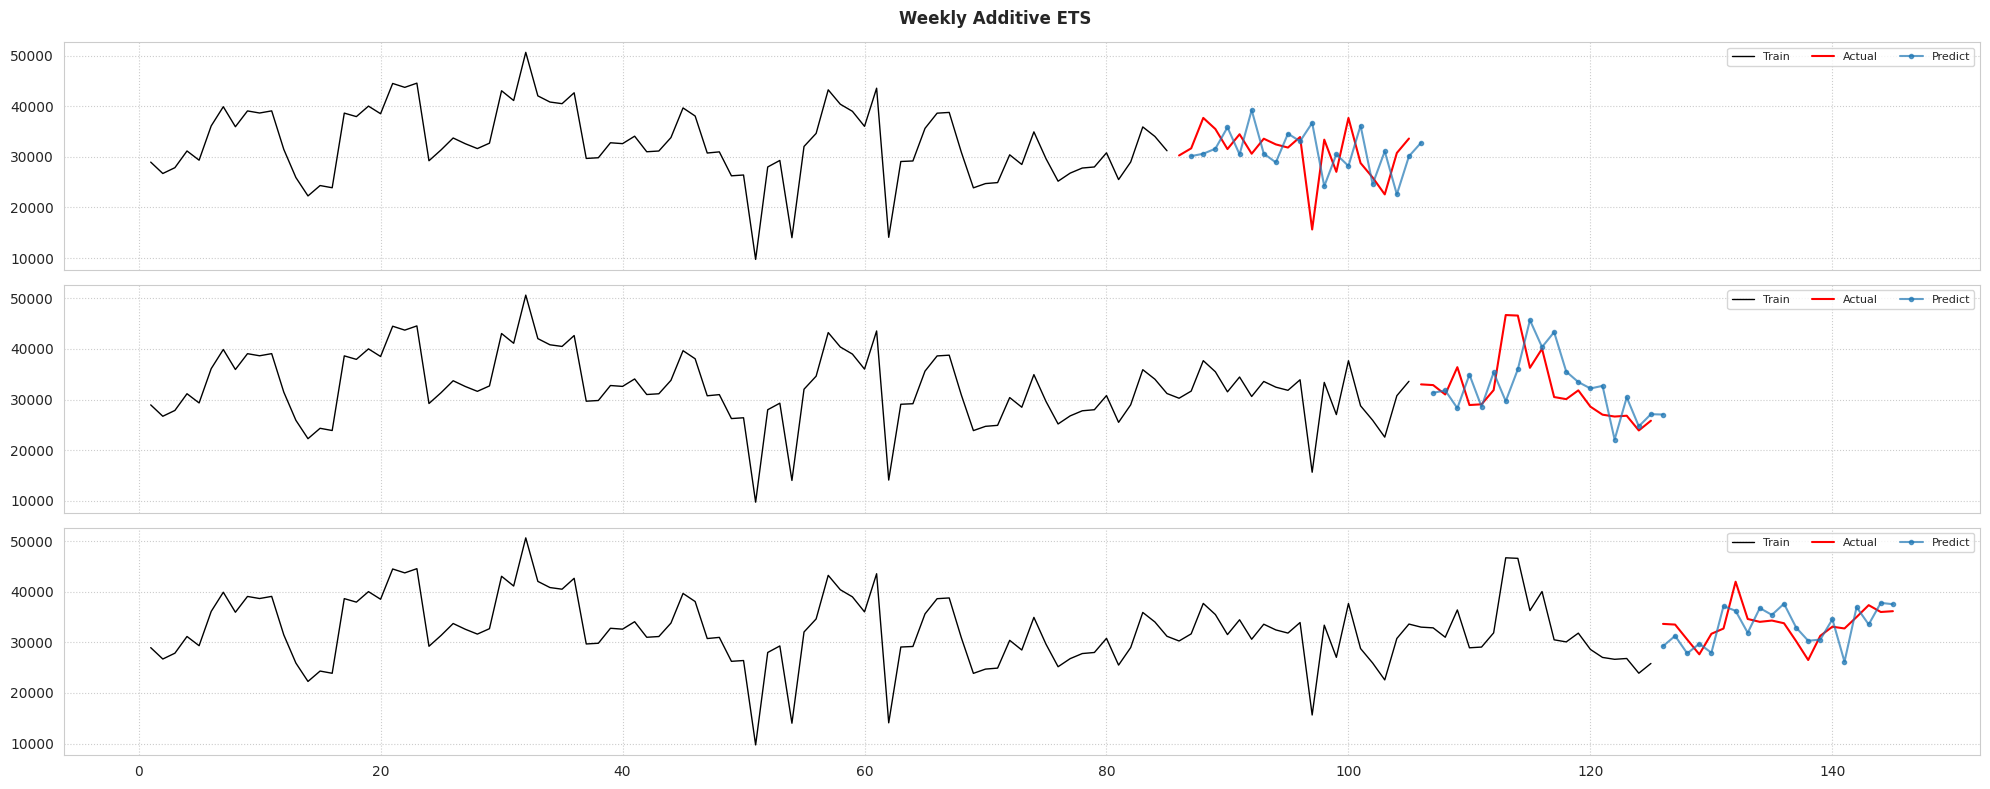

MSE     0.001272
RMSE    0.035565
MAE     0.028691
MAPE    9.317781
dtype: float64

In [47]:
weekly_ets_metrics = calcWeeklyPredEvalMetrics(mealId,
                                                 eval_wks,
                                                 weekly_ets_add_fitted,
                                                 'Weekly Additive ETS')
weekly_ets_metrics.mean(numeric_only=True)


---

SARIMA

In [48]:
# SARIMA model
weekly_orders_sarima = full_data[full_data['meal_id'] == 1062].groupby('week')['num_orders'].sum().reset_index()
train_data_sarima = weekly_orders_sarima.iloc[:-20]
test_data_sarima = weekly_orders_sarima.iloc[-20:]
sarima_model = sm.tsa.statespace.SARIMAX(train_data_sarima['num_orders'],
                                         order=(1, 1, 1),
                                         seasonal_order=(1, 1, 1, 52),
                                         enforce_stationarity=False,
                                         enforce_invertibility=False)
results = sarima_model.fit(disp=False)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


In [49]:
# SARIMA Forecast
forecast = results.get_forecast(steps=20).predicted_mean
test_weeks = test_data_sarima['week']
actual_values = test_data_sarima['num_orders']

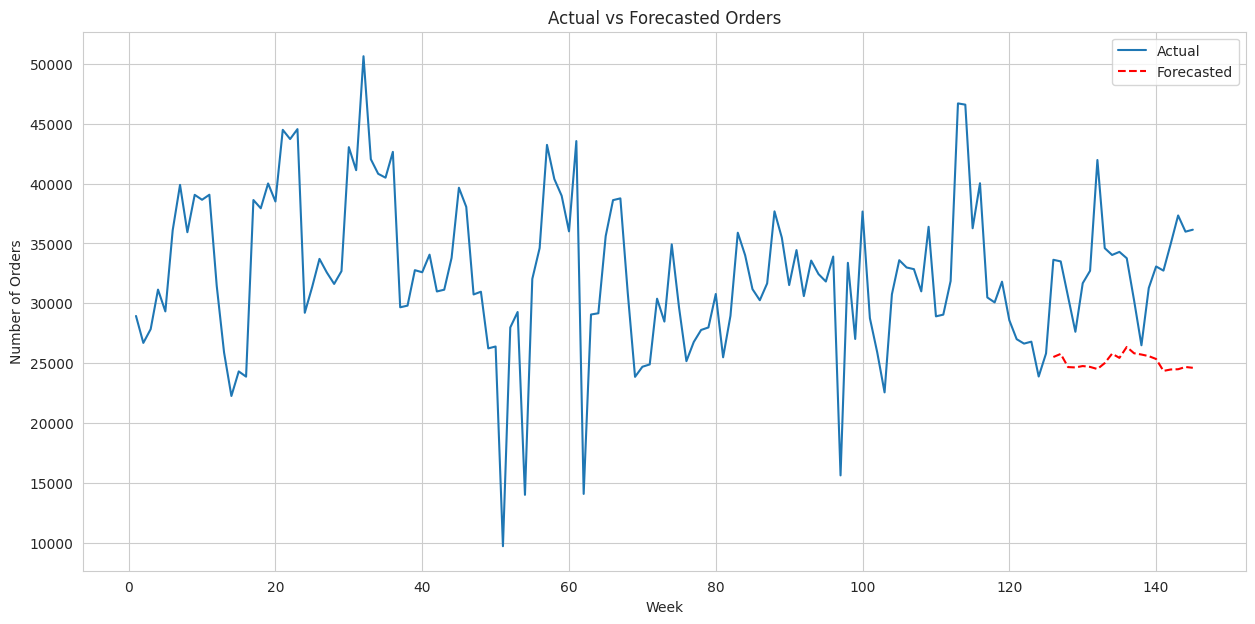

In [50]:
# Plotting SARIMA results
plt.figure(figsize=(15,7))
plt.plot(weekly_orders_sarima['week'], weekly_orders_sarima['num_orders'], label='Actual')
plt.plot(test_weeks, forecast, label='Forecasted', color='red', linestyle='--')
plt.title('Actual vs Forecasted Orders')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.legend()
plt.grid(True)
plt.show()

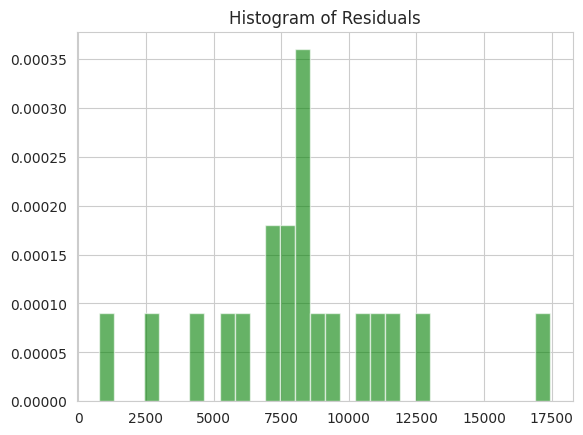

In [51]:
# Residual analysis
residuals = actual_values - forecast
plt.hist(residuals, bins=30, density=True, alpha=0.6, color='g')
plt.title("Histogram of Residuals")
plt.show()

In [52]:
# Skewness and Kurtosis
from scipy.stats import skew, kurtosis
res_skewness = skew(residuals)
res_kurtosis = kurtosis(residuals)
print(f"Skewness of Residuals: {res_skewness}")
print(f"Kurtosis of Residuals: {res_kurtosis}")

Skewness of Residuals: 0.3732775501748985
Kurtosis of Residuals: 0.9638912029462481


---

### Cross-validation

In [53]:
from math import sqrt

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA


In [54]:
def fitPredictARIMA(obs_data: pd.Series,
                    arima_model: ARIMA,
                    n_periods: int) -> tuple[pd.Series, pd.Series, pd.Series]:
    train_data, test_data = train_test_split(obs_data,
                                             test_size=n_periods,
                                             random_state=25,
                                             shuffle=False)
    model = ARIMA(train_data,
                  order=arima_model.order,
                  seasonal_order=arima_model.seasonal_order)
    model_fit = model.fit()
    predict_data = model_fit.forecast(n_periods, alpha=0.05)
    return train_data, test_data, predict_data

In [55]:
def calcMetrics_for_cv(test: pd.Series, pred: pd.Series, modelname: str):
    actuals = test.values.flatten()
    predictions = pred.values.flatten()

    # Scaling the RMSE and MAE by 10^-5
    rmse = sqrt(mean_squared_error(actuals, predictions)) * 1e-5
    mae = mean_absolute_error(actuals, predictions) * 1e-5

    mape = np.mean(np.abs((actuals - predictions) / actuals)) * 100

    metrics = {
        'Model': modelname,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape
    }

    eval_df = pd.DataFrame(metrics, index=[0])
    return eval_df

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this

,Model,RMSE,MAE,MAPE,Week
0,Weekly Seasonal ARIMA,0.048443,0.031881,12.937370,100
0,Weekly Seasonal ARIMA,0.061148,0.044913,13.623711,120
0,Weekly Seasonal ARIMA,0.042791,0.032830,11.352684,140


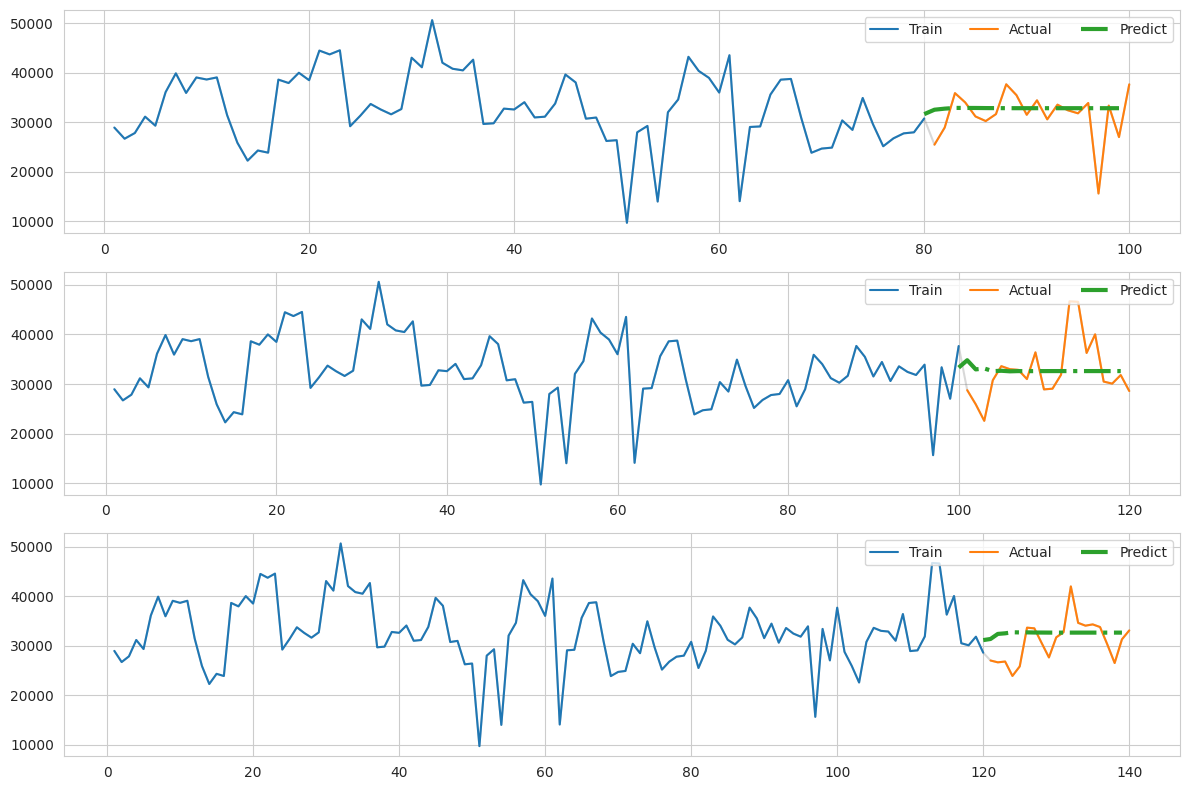

In [56]:
def crossValidARIMA(obs_data: pd.Series,
                    arima_model: ARIMA,
                    modelname: str,
                    n_periods: int,
                    cross_wks: list[int]):
    metrics_df = pd.DataFrame()
    fig, axs = plt.subplots(len(cross_wks), 1, figsize=(12, 8))
    for i in range(len(cross_wks)):
        wk = cross_wks[i]
        ax = axs[i]
        curr_obs = obs_data[obs_data.index <= wk]
        train_data, test_data, predict_data = fitPredictARIMA(curr_obs,
                                                              arima_model,
                                                              n_periods)
        curr_metrics_df = calcMetrics_for_cv(test_data, predict_data, modelname)
        curr_metrics_df['Week'] = wk
        metrics_df = pd.concat([metrics_df, curr_metrics_df])
        # Plot cross evaluation
        ax.plot(curr_obs, color='gray', alpha=0.3)
        ax.plot(train_data, label='Train')
        ax.plot(test_data, label='Actual')
        ax.plot(predict_data, label='Predict', linewidth=3, linestyle='-.')
        ax.legend(loc='upper right', ncols=3)
    plt.tight_layout()
    return metrics_df


# Define the weeks for cross-validation
cross_wks = [100, 120, 140]  # Adjust these weeks based on your dataset

weekly_metrics = crossValidARIMA(mealId,
                                 weekly_arima_auto,
                                 'Weekly Seasonal ARIMA',
                                 20,  # 20 weeks for each test period
                                 cross_wks)
weekly_metrics

---

plot for presentation

In [57]:
weekly_arima_auto

ARIMA(order=(3, 0, 0), scoring_args={}, seasonal_order=(0, 0, 0, 12),
      suppress_warnings=True)

In [58]:
weekly_ets_add

In [59]:
eval_wks

[105, 125, 145]

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

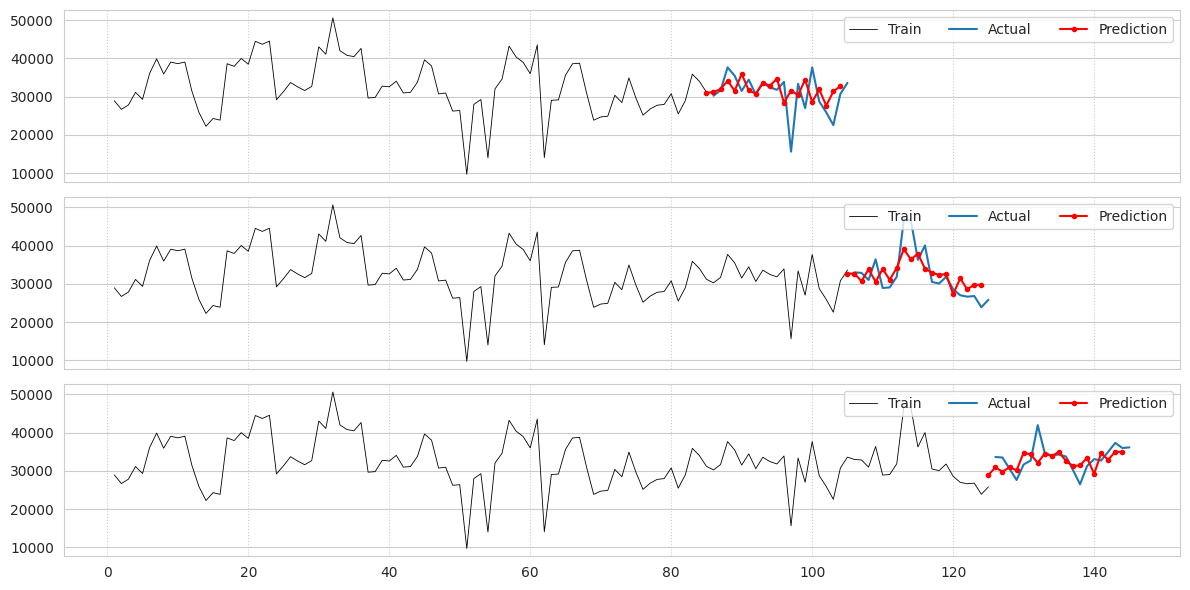

In [60]:
arima_add_ets_metrics_df = pd.DataFrame()
fig, axs = plt.subplots(len(eval_wks), 1, figsize=(12, 6),
                        sharex=True, sharey=True)
for i in range(len(eval_wks)):
    wk = eval_wks[i]
    curr_data = mealId[mealId.index <= wk]  # Adjust this line to use your actual data
    arima = EvalModel(curr_data, weekly_arima_auto, 'Auto ARIMA', 20)

    ets = EvalModel(curr_data, weekly_ets_add_fitted, 'Additive ETS', 20)
    # Correct the forecast index for ets predictions
    # start_of_forecast = arima.train.index[-1] + 1
    # forecast_index = np.arange(start_of_forecast, start_of_forecast + 20)
    ets.pred.index = arima.pred.index

    train = arima.train
    test = arima.test

    pred = (arima.pred + ets.pred) / 2

    curr_metrics = calcMetrics(test, pred, 'ARIMA + Additive ETS')
    arima_add_ets_metrics_df = pd.concat([arima_add_ets_metrics_df, curr_metrics])

    # Plot
    ax = axs[i]
    ax.plot(train.index, train, label='Train', color='black', linewidth=0.6)
    ax.plot(test.index, test, label='Actual')
    ax.plot(pred.index, pred, label='Prediction', color='red', marker='.')
    ax.grid(axis='x', linestyle='dotted')
axs[0].legend(loc='upper right', ncol=3)
axs[1].legend(loc='upper right', ncol=3)
axs[2].legend(loc='upper right', ncol=3)
plt.tight_layout()
plt.show()

In [ ]:
arima_add_ets_metrics_df.mean(numeric_only=True)

MSE     0.001403
RMSE    0.037070
MAE     0.026059
MAPE    8.807607
dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

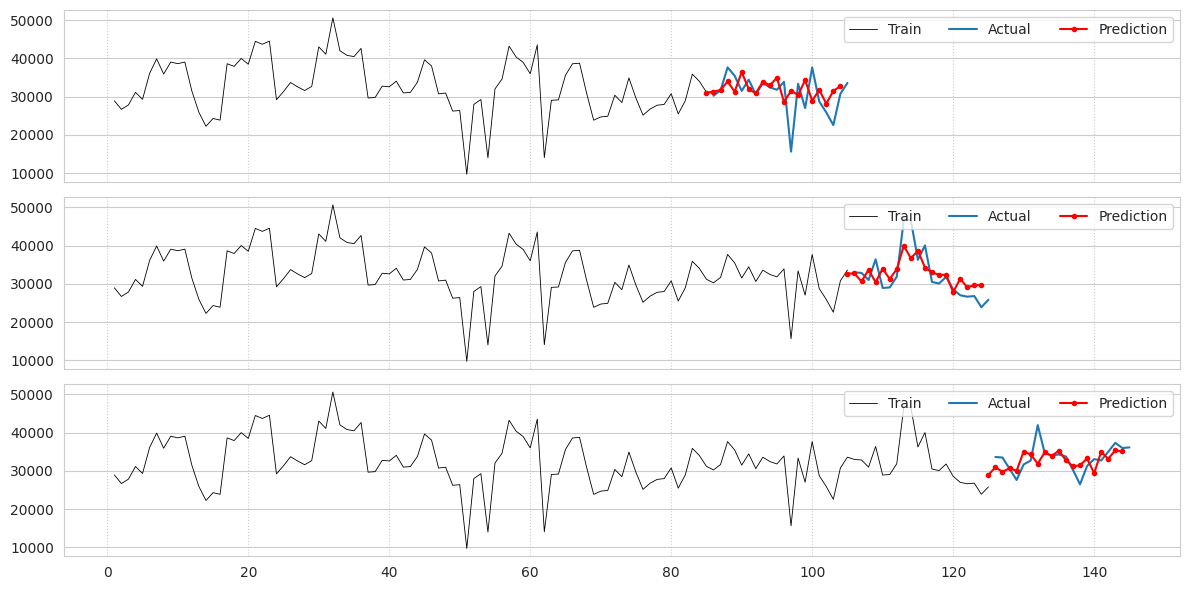

In [61]:
arima_mul_ets_metrics_df = pd.DataFrame()
fig, axs = plt.subplots(len(eval_wks), 1, figsize=(12, 6),
                        sharex=True, sharey=True)
for i in range(len(eval_wks)):
    wk = eval_wks[i]
    curr_data = mealId[mealId.index <= wk]  # Adjust this line to use your actual data
    arima = EvalModel(curr_data, weekly_arima_auto, 'Auto ARIMA', 20)

    ets = EvalModel(curr_data, weekly_ets_mul_fitted, 'Mul ETS', 20)
    # Correct the forecast index for ets predictions
    # start_of_forecast = arima.train.index[-1] + 1
    # forecast_index = np.arange(start_of_forecast, start_of_forecast + 20)
    ets.pred.index = arima.pred.index

    train = arima.train
    test = arima.test

    pred = (arima.pred + ets.pred) / 2

    curr_metrics = calcMetrics(test, pred, 'ARIMA + Mul ETS')
    arima_mul_ets_metrics_df = pd.concat([arima_mul_ets_metrics_df, curr_metrics])

    # Plot
    ax = axs[i]
    ax.plot(train.index, train, label='Train', color='black', linewidth=0.6)
    ax.plot(test.index, test, label='Actual')
    ax.plot(pred.index, pred, label='Prediction', color='red', marker='.')
    ax.grid(axis='x', linestyle='dotted')
axs[0].legend(loc='upper right', ncol=3)
axs[1].legend(loc='upper right', ncol=3)
axs[2].legend(loc='upper right', ncol=3)
plt.tight_layout()
plt.show()

In [62]:
arima_mul_ets_metrics_df.mean(numeric_only=True)

MSE     0.001421
RMSE    0.037285
MAE     0.026458
MAPE    8.970901
dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

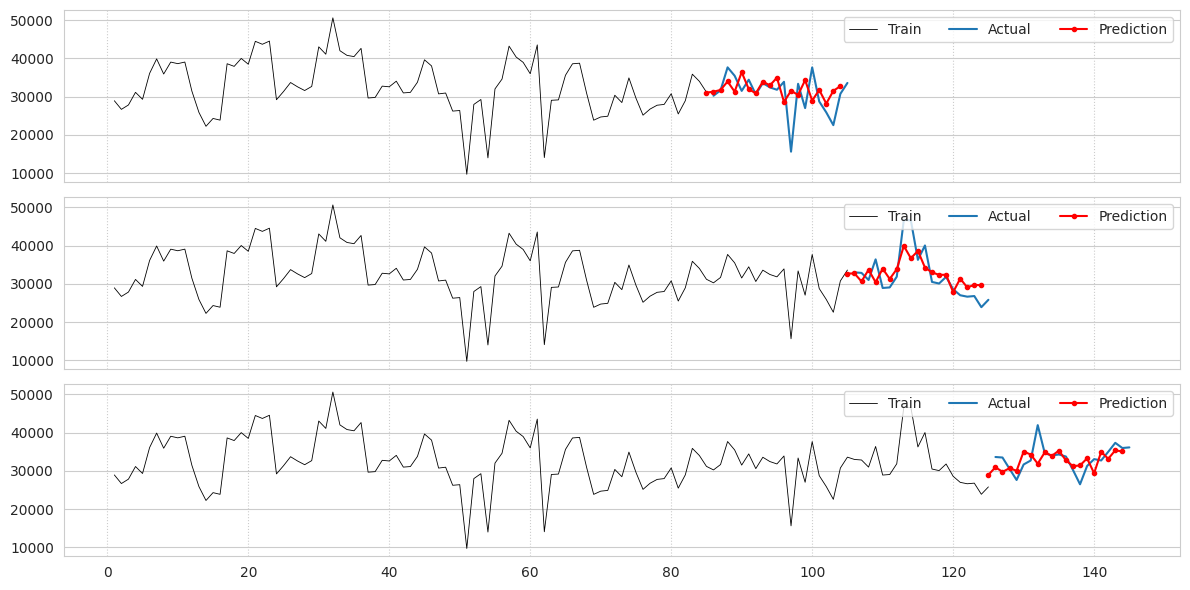

In [63]:
arima_add_mul_ets_metrics_df = pd.DataFrame()
fig, axs = plt.subplots(len(eval_wks), 1, figsize=(12, 6),
                        sharex=True, sharey=True)
for i in range(len(eval_wks)):
    wk = eval_wks[i]
    curr_data = mealId[mealId.index <= wk]  # Adjust this line to use your actual data
    arima = EvalModel(curr_data, weekly_arima_auto, 'Auto ARIMA', 20)

    ets = EvalModel(curr_data, weekly_ets_add_mul_fitted, 'Add Mul ETS', 20)
    # Correct the forecast index for ets predictions
    # start_of_forecast = arima.train.index[-1] + 1
    # forecast_index = np.arange(start_of_forecast, start_of_forecast + 20)
    ets.pred.index = arima.pred.index

    train = arima.train
    test = arima.test

    pred = (arima.pred + ets.pred) / 2

    curr_metrics = calcMetrics(test, pred, 'ARIMA + Add Mul ETS')
    arima_add_mul_ets_metrics_df = pd.concat([arima_add_mul_ets_metrics_df, curr_metrics])

    # Plot
    ax = axs[i]
    ax.plot(train.index, train, label='Train', color='black', linewidth=0.6)
    ax.plot(test.index, test, label='Actual')
    ax.plot(pred.index, pred, label='Prediction', color='red', marker='.')
    ax.grid(axis='x', linestyle='dotted')
axs[0].legend(loc='upper right', ncol=3)
axs[1].legend(loc='upper right', ncol=3)
axs[2].legend(loc='upper right', ncol=3)
plt.tight_layout()
plt.show()

In [64]:
arima_add_mul_ets_metrics_df.mean(numeric_only=True)

MSE     0.001423
RMSE    0.037311
MAE     0.026473
MAPE    8.976877
dtype: float64

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

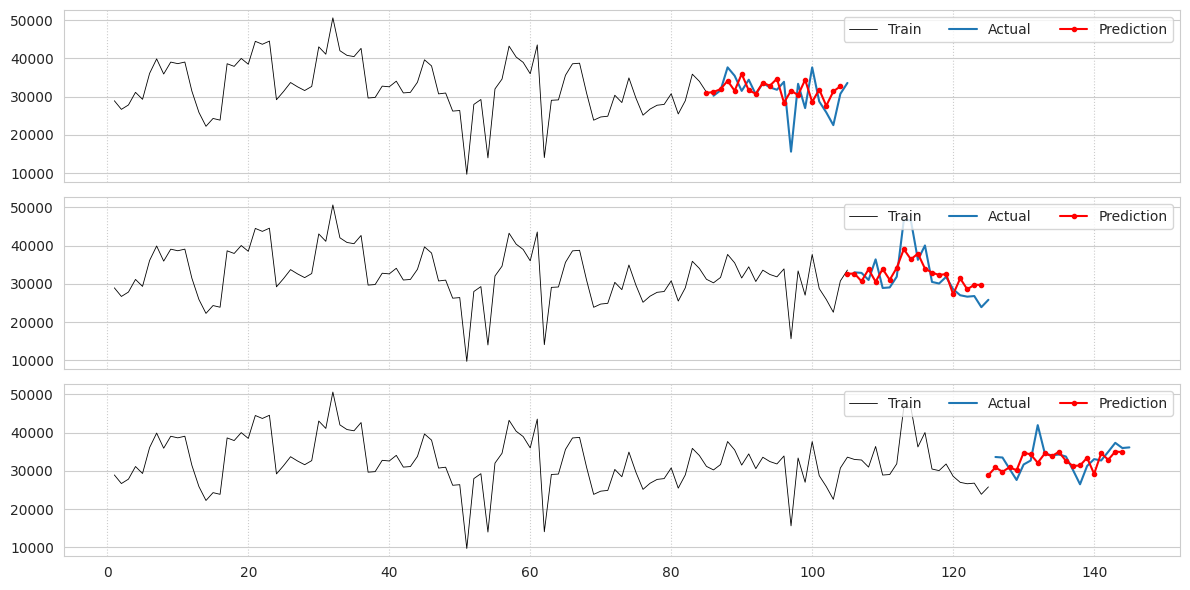

In [65]:
arima_mul_add_ets_metrics_df = pd.DataFrame()
fig, axs = plt.subplots(len(eval_wks), 1, figsize=(12, 6),
                        sharex=True, sharey=True)
for i in range(len(eval_wks)):
    wk = eval_wks[i]
    curr_data = mealId[mealId.index <= wk]  # Adjust this line to use your actual data
    arima = EvalModel(curr_data, weekly_arima_auto, 'Auto ARIMA', 20)

    ets = EvalModel(curr_data, weekly_ets_mul_add_fitted, 'Mul Add ETS', 20)
    # Correct the forecast index for ets predictions
    # start_of_forecast = arima.train.index[-1] + 1
    # forecast_index = np.arange(start_of_forecast, start_of_forecast + 20)
    ets.pred.index = arima.pred.index

    train = arima.train
    test = arima.test

    pred = (arima.pred + ets.pred) / 2

    curr_metrics = calcMetrics(test, pred, 'ARIMA + Mul Add ETS')
    arima_mul_add_ets_metrics_df = pd.concat([arima_mul_add_ets_metrics_df, curr_metrics])

    # Plot
    ax = axs[i]
    ax.plot(train.index, train, label='Train', color='black', linewidth=0.6)
    ax.plot(test.index, test, label='Actual')
    ax.plot(pred.index, pred, label='Prediction', color='red', marker='.')
    ax.grid(axis='x', linestyle='dotted')
axs[0].legend(loc='upper right', ncol=3)
axs[1].legend(loc='upper right', ncol=3)
axs[2].legend(loc='upper right', ncol=3)
plt.tight_layout()
plt.show()

In [66]:
arima_mul_add_ets_metrics_df.mean(numeric_only=True)

MSE     0.001401
RMSE    0.037043
MAE     0.026046
MAPE    8.802127
dtype: float64

In [67]:
arima_add_ets_metrics_df = arima_add_ets_metrics_df.mean(numeric_only=True).to_frame().transpose()
arima_mul_ets_metrics_df = arima_mul_ets_metrics_df.mean(numeric_only=True).to_frame().transpose()
arima_add_mul_ets_metrics_df = arima_add_mul_ets_metrics_df.mean(numeric_only=True).to_frame().transpose()
arima_mul_add_ets_metrics_df = arima_mul_add_ets_metrics_df.mean(numeric_only=True).to_frame().transpose()

all_metrics_df = pd.concat([
    arima_add_ets_metrics_df,
    arima_mul_ets_metrics_df,
    arima_add_mul_ets_metrics_df,
    arima_mul_add_ets_metrics_df
], ignore_index=True)

# add column for name of model
all_metrics_df['Model'] = [
    'ARIMA + Additive ETS',
    'ARIMA + Multiplicative ETS',
    'ARIMA + Additive Multiplicative ETS',
    'ARIMA + Multiplicative Additive ETS'
]

all_metrics_df = all_metrics_df[['Model', 'MSE', 'RMSE', 'MAE', 'MAPE']]

all_metrics_df


,Model,MSE,RMSE,MAE,MAPE
0,ARIMA + Additive ETS,0.001403,0.037070,0.026059,8.807607
1,ARIMA + Multiplicative ETS,0.001421,0.037285,0.026458,8.970901
2,ARIMA + Additive Multiplicative ETS,0.001423,0.037311,0.026473,8.976877
3,ARIMA + Multiplicative Additive ETS,0.001401,0.037043,0.026046,8.802127


In [68]:
# sort and show the best model
all_metrics_df.sort_values(by='MAPE')

,Model,MSE,RMSE,MAE,MAPE
3,ARIMA + Multiplicative Additive ETS,0.001401,0.037043,0.026046,8.802127
0,ARIMA + Additive ETS,0.001403,0.037070,0.026059,8.807607
1,ARIMA + Multiplicative ETS,0.001421,0.037285,0.026458,8.970901
2,ARIMA + Additive Multiplicative ETS,0.001423,0.037311,0.026473,8.976877


ARIMA + Multiplicative Additive ETS is kind of the best among the four

In [107]:
np.array(test.values).reshape(-1)

array([33633, 33497, 30541, 27623, 31678, 32713, 41962, 34603, 34036,
       34293, 33761, 30233, 26498, 31280, 33077, 32729, 34990, 37333,
       35981, 36144])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


363745.3333333333
455226.66666666674


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

264685.1666666667


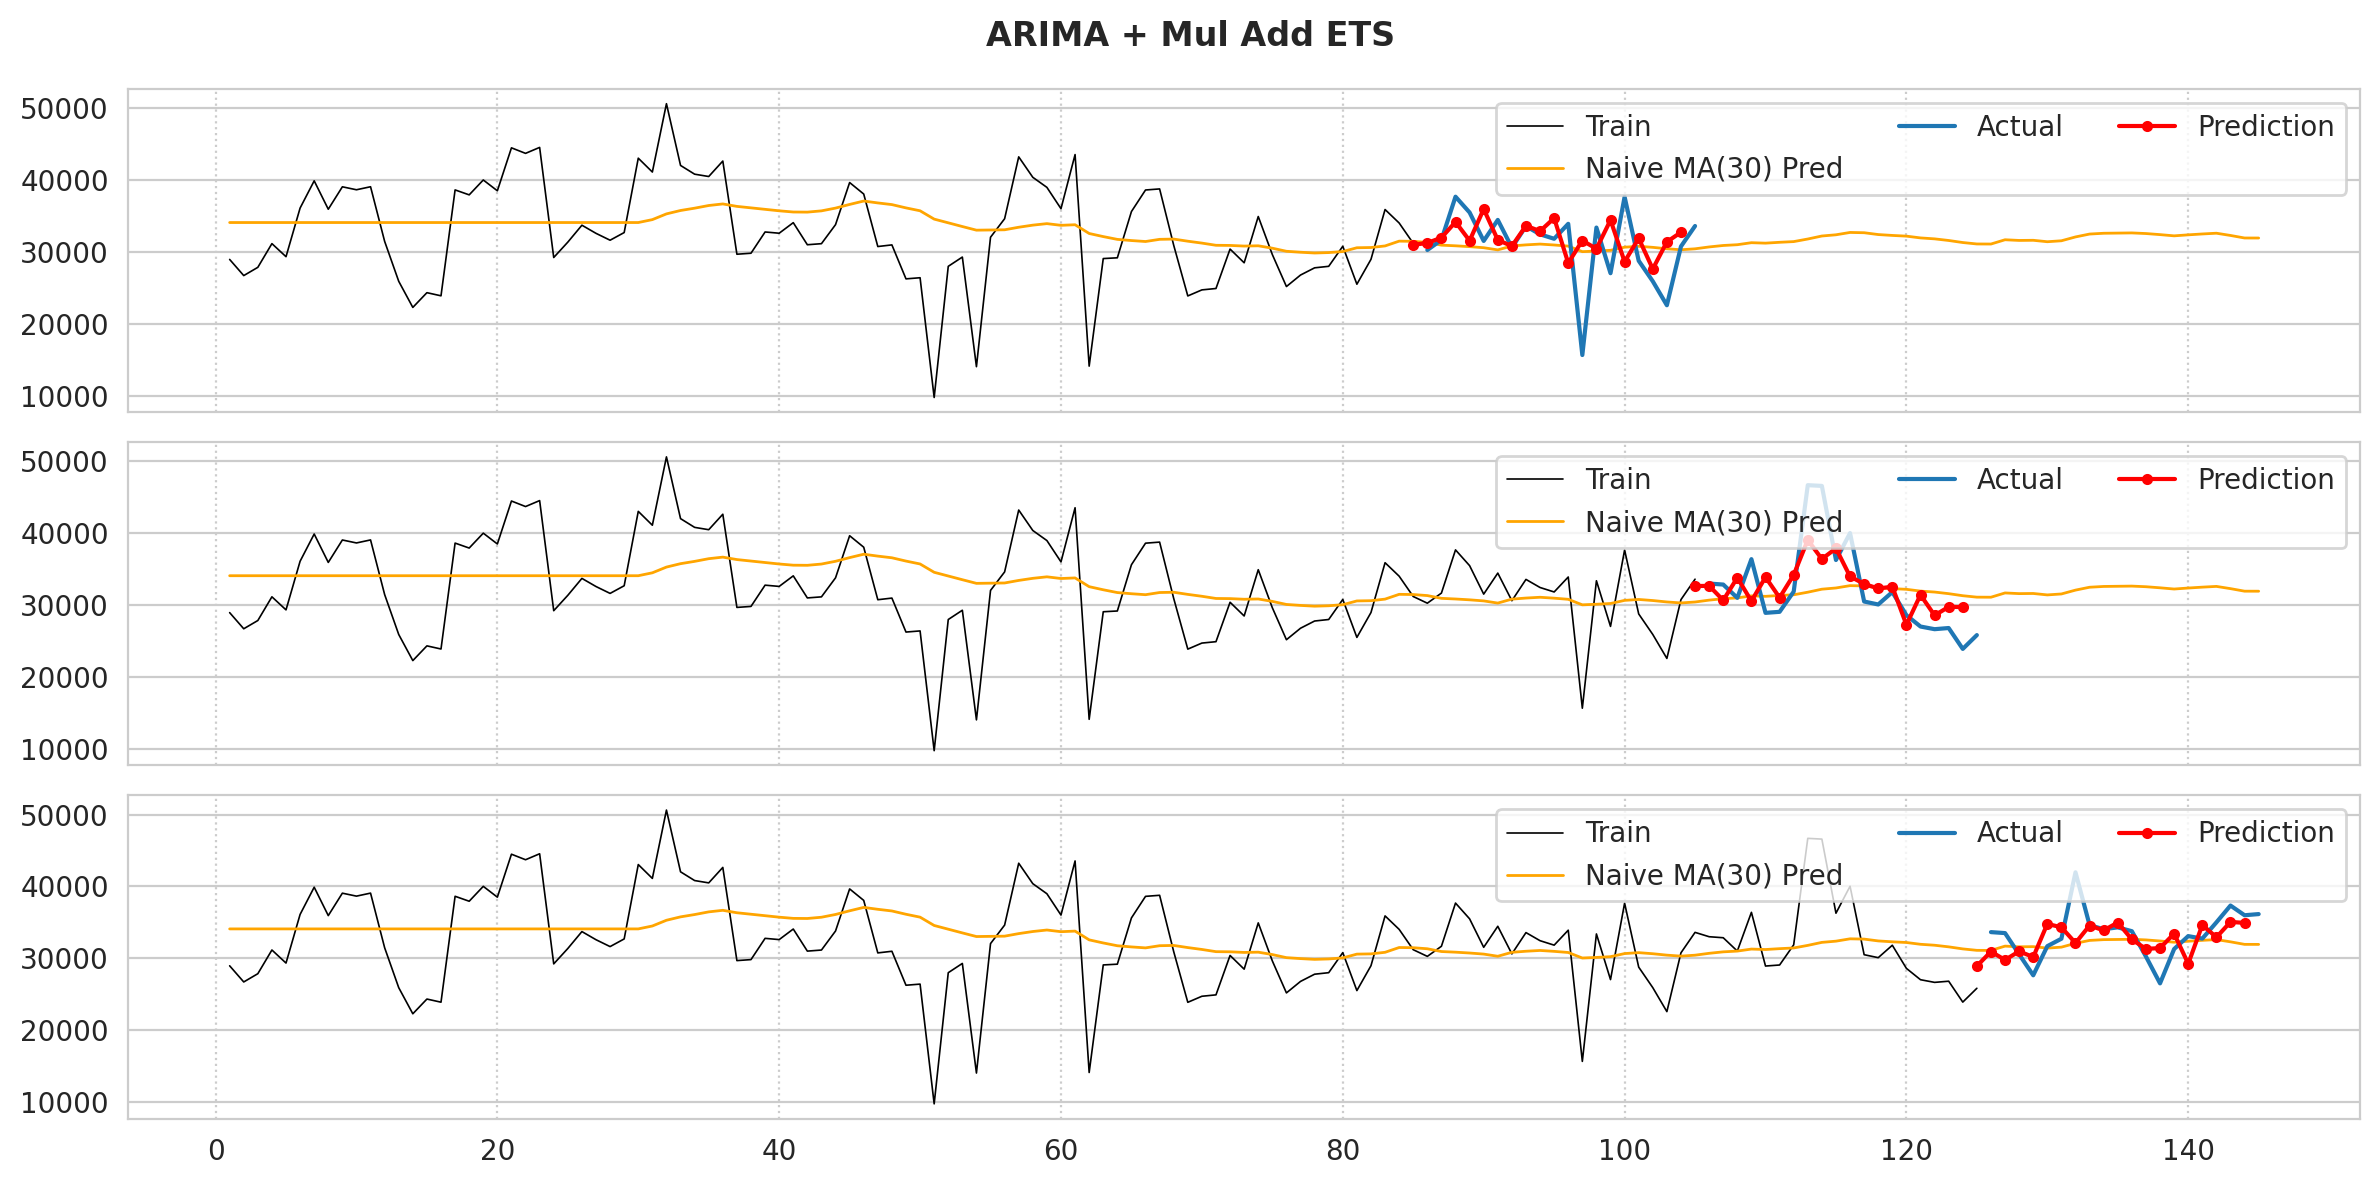

Naive method cost dollars:  361219.05555555556 Our method cost dollars:  260462.4594862759 Saved:  100756.59606927965


In [109]:
arima_mul_add_ets_metrics_df = pd.DataFrame()
fig, axs = plt.subplots(len(eval_wks), 1, figsize=(12, 6),
                        sharex=True, sharey=True, dpi=200)
cost_naive = []
cost_ours = []
for i in range(len(eval_wks)):
    wk = eval_wks[i]
    curr_data = mealId[mealId.index <= wk]  # Adjust this line to use your actual data
    arima = EvalModel(curr_data, weekly_arima_auto, 'Auto ARIMA', 20)

    ets = EvalModel(curr_data, weekly_ets_mul_add_fitted, 'Mul Add ETS', 20)
    # Correct the forecast index for ets predictions
    # start_of_forecast = arima.train.index[-1] + 1
    # forecast_index = np.arange(start_of_forecast, start_of_forecast + 20)
    ets.pred.index = arima.pred.index

    train = arima.train
    test = arima.test

    pred = (arima.pred + ets.pred) / 2

    curr_metrics = calcMetrics(test, pred, 'ARIMA + Mul Add ETS')
    arima_mul_add_ets_metrics_df = pd.concat([arima_mul_add_ets_metrics_df, curr_metrics])

    # Plot
    ax = axs[i]
    ax.plot(train.index, train, label='Train', color='black', linewidth=0.6)

    #for comparing with base model
    naive_ma = mealId.rolling(window=30).mean().fillna(method = "backfill")
    ax.plot( naive_ma, label='Naive MA(30) Pred', color='orange', linewidth=1)

    waste_cost = 5 # 5 dollars each meal for food waste or not enough orders
    test_indices = np.array(list(test.index))-1
    cost1 = np.sum(np.abs(np.array(naive_ma)[test_indices].reshape(-1) - np.array(test.values).reshape(-1))) * waste_cost
    cost2= np.sum(np.abs(np.array(pred) - np.array(test.values).reshape(-1))) * waste_cost
    print(cost1)
    cost_naive.append(cost1)
    cost_ours.append(cost2)


    ax.plot(test.index, test, label='Actual')
    ax.plot(pred.index, pred, label='Prediction', color='red', marker='.')
    ax.grid(axis='x', linestyle='dotted')
axs[0].legend(loc='upper right', ncol=3)
axs[1].legend(loc='upper right', ncol=3)
axs[2].legend(loc='upper right', ncol=3)
fig.suptitle('ARIMA + Mul Add ETS', fontweight='bold')
plt.tight_layout()
plt.show()
print("Naive method cost dollars: ", np.mean(cost_naive), "Our method cost dollars: ", np.mean(cost_ours), "Saved: ", np.mean(cost_naive)-np.mean(cost_ours))